In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y


def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

#the coeffcients are not normalised so only the ralative values matter
def fourier(y):
    length = len(y)
    x = np.arange(0,len(y))
    an = [sum(y)/2]
    bn = [0]
    for a in range(1,int(length/2)):
        an.append(np.dot(y,np.cos(2*np.pi/len(y)*a*x)))
    for b in range(1,int(length/2)):
        bn.append(np.dot(y,np.sin(2*np.pi/len(y)*b*x)))
    an,bn = np.array(an), np.array(bn)
    return an/length*2,bn/length*2

(array([   9.38721764, 2393.98326972,    3.18202147,   51.28148243]),
 array([[ 2.40002281e-05, -5.66183789e-05,  2.97547544e-07,
         -2.85051702e-09],
        [-5.66183789e-05,  2.89421422e-02, -1.52165986e-04,
          1.14776006e-06],
        [ 2.97547544e-07, -1.52165986e-04,  1.06977755e-06,
         -1.23819431e-08],
        [-2.85051702e-09,  1.14776006e-06, -1.23819431e-08,
          1.19150063e-05]]))

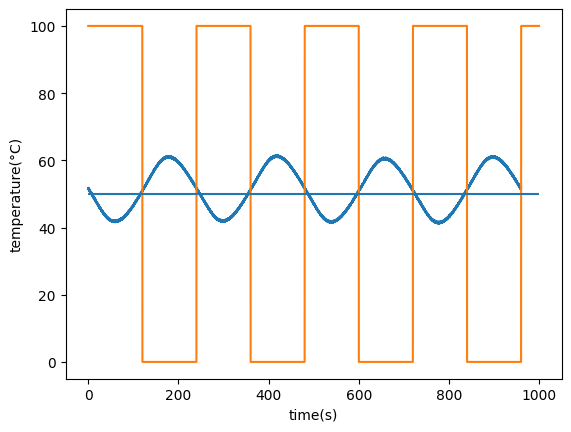

In [2]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1/10,y1)

x2, y2 = square(50,50,240,100,0,1000)
plt.plot(x2,y2)

plt.hlines(50,0,1000)


def sin(x,amp,period,phase,offset):
    return amp*np.sin(2*np.pi/period*x-phase)+offset
para = curve_fit(sin,x1,y1,p0=[10,2400,np.pi,50])
#plt.plot(x1/10,sin(x1,*para[0]))
plt.xlabel("time(s)")
plt.ylabel("temperature(°C)")
para

In [3]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)

an = np.array(an)
bn = np.array(bn)

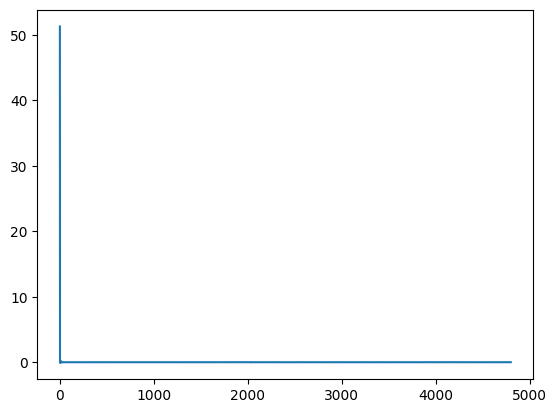

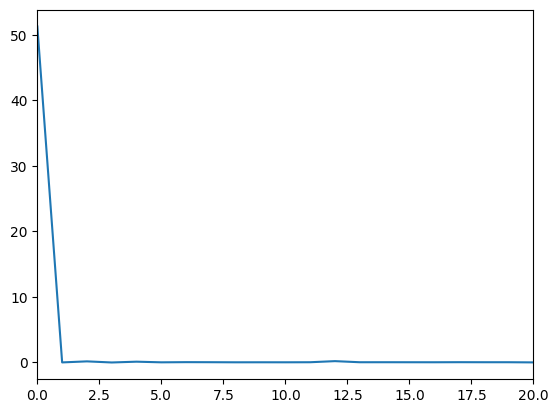

In [4]:
plt.plot(an)
plt.show()

plt.xlim(0,20)
plt.plot(an)

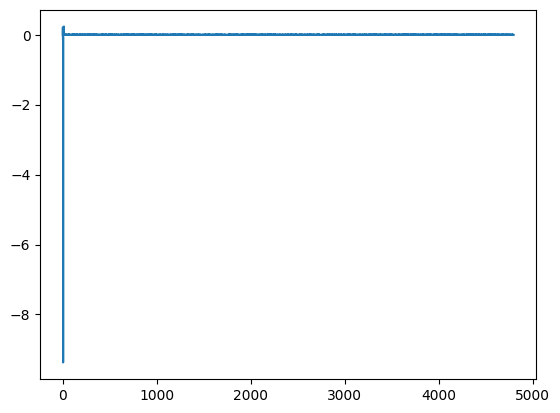

(0.0, 20.0)

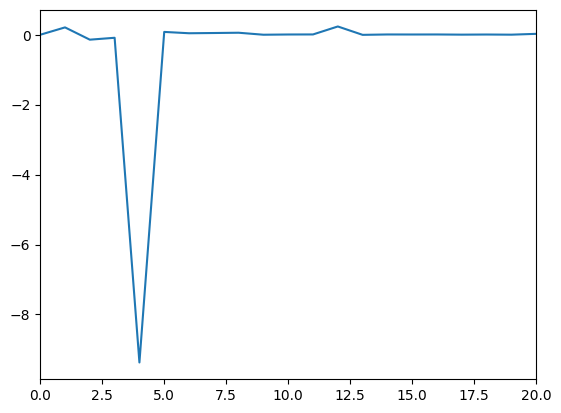

In [5]:
plt.plot(bn)
plt.show()

plt.plot(bn)
plt.xlim(0,20)



amplitude: 9.373875989233472
phase: 3.1327479201633444


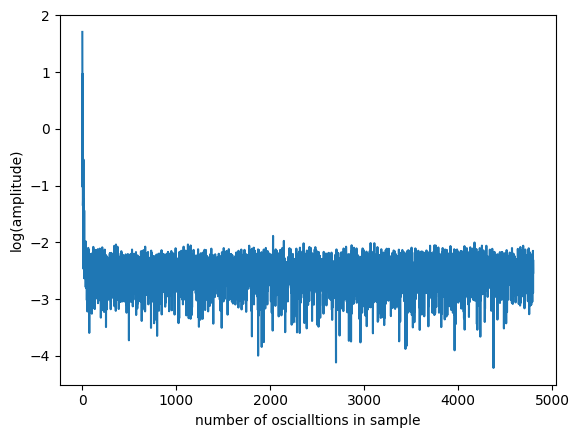

In [29]:
num = 9600

magnitude = np.sqrt(an[:num]**2+bn[:num]**2)
plt.plot(np.log10(magnitude))
plt.ylabel("log(amplitude)")
plt.xlabel("number of oscialltions in sample")

phase = np.arctan2(an[:num],bn[:num])
print(f"amplitude: {(an[4]**2+bn[4]**2)**0.5}")
print(f"phase: {phase[4]}")



Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

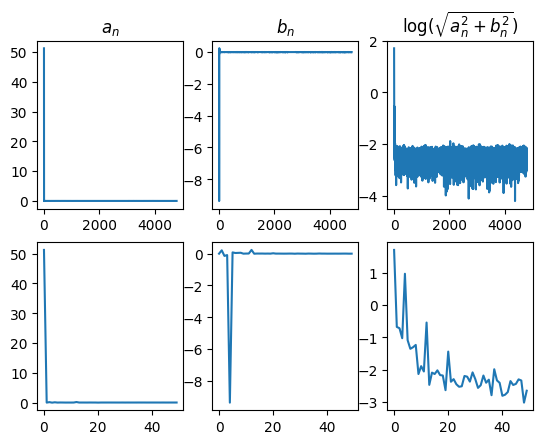

In [27]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

In [ ]:
x3, y3 = np.loadtxt("thermal_4min_b.txt", unpack=True, skiprows=3)
plt.plot(x3,y3)

x2, y2 = square(50,50,2400,100,0,10000)
plt.plot(x2,y2)

plt.hlines(50,0,10000)